# Word Graph


In [ ]:
!pip install PyPDF2 nltk networkx pandas matplotlib tqdm
import os, re, math
from collections import Counter
from itertools import combinations
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


  Using cached pypdf2-3.0.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
Using cached pypdf2-3.0.1-py3-none-any.whl (232 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)

   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ------------- -------------------------- 1/3 [PyPDF2]
   ------------- -------------------------- 1/3 [PyPDF2]
   ------------- -------------------------- 1/3 [PyPDF2]
   ------------- -------------------------- 1/3 [PyPDF2]
   ------------- -------------------------- 1/3 [PyPDF2]
   ------------- -------------------------- 1/3 [PyPDF2]
   ------------- -------------------------- 1/3 [PyPDF2]
   ------------- ---------------------

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abror\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abror\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abror\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import PyPDF2
import re
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

nltk.download("punkt")  # sekali saja

# --- baca PDF ---
def read_pdf(path):
    pages = []
    with open(path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for p in reader.pages:
            t = p.extract_text()
            if t:
                pages.append(t)
    return "\n".join(pages)

# GANTI path kalau perlu
pdf_text = read_pdf("document.pdf")

print("Panjang teks mentah:", len(pdf_text))
print(pdf_text[:500])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abror\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Panjang teks mentah: 38847
197     Jurnal Geografi Gea, Volume 20, Nomor 2, Oktober 2020 . 
 
 
 
ANALISIS PASCA BENCANA TANAH LONGSOR 1 JANUARI 
2020 DAN EVALUASI PENATAAN KAWASAN DI 
KECAMATAN SUKAJAYA, KABUPATEN BOGOR  
 
Heru Sri Naryanto1, Firman Prawiradisastra2, Ruki Ardiyanto3, Wahyu Hidayat4 
1,2Pusat Teknologi Reduksi Risiko Bencana, 3Pusat Teknologi Pengembangan Sumberdaya 
Wilayah, 4Pusat Teknologi Pengembangan Sumberdaya Mineral,  
Badan Pengkajian dan Penerapan (BPPT), Gedung Geostech, Kompleks Puspiptek Ser


In [4]:
from nltk.tokenize import word_tokenize

def clean_text(text):
    # buang bagian referensi kalau ada
    cut = re.search(r"(DAFTAR PUSTAKA|REFERENSI|References|Bibliographie)",
                    text, re.IGNORECASE)
    if cut:
        text = text[:cut.start()]
    # rapikan spasi
    text = re.sub(r"\s+", " ", text)
    return text.strip()

cleaned = clean_text(pdf_text)

print("Panjang teks cleaned:", len(cleaned))
print(cleaned[:500])

# --- tokenisasi kata: jaga urutan! ---
tokens = word_tokenize(cleaned.lower())

# ambil hanya huruf (buang angka/tanda baca)
words = [re.sub(r"[^a-zA-Z]", "", w) for w in tokens]
words = [w for w in words if w != ""]  # buang string kosong

print("Total kata:", len(words))
print("20 kata pertama:", words[:20])

Panjang teks cleaned: 32900
197 Jurnal Geografi Gea, Volume 20, Nomor 2, Oktober 2020 . ANALISIS PASCA BENCANA TANAH LONGSOR 1 JANUARI 2020 DAN EVALUASI PENATAAN KAWASAN DI KECAMATAN SUKAJAYA, KABUPATEN BOGOR Heru Sri Naryanto1, Firman Prawiradisastra2, Ruki Ardiyanto3, Wahyu Hidayat4 1,2Pusat Teknologi Reduksi Risiko Bencana, 3Pusat Teknologi Pengembangan Sumberdaya Wilayah, 4Pusat Teknologi Pengembangan Sumberdaya Mineral, Badan Pengkajian dan Penerapan (BPPT), Gedung Geostech, Kompleks Puspiptek Serpong, Kota Tanger ang
Total kata: 4298
20 kata pertama: ['jurnal', 'geografi', 'gea', 'volume', 'nomor', 'oktober', 'analisis', 'pasca', 'bencana', 'tanah', 'longsor', 'januari', 'dan', 'evaluasi', 'penataan', 'kawasan', 'di', 'kecamatan', 'sukajaya', 'kabupaten']


In [5]:
from itertools import zip_longest

G = nx.Graph()

# tambahkan node
for w in words:
    if not G.has_node(w):
        G.add_node(w)

# tambahkan edge untuk pasangan bertetangga (distance = 1)
for w1, w2 in zip(words, words[1:]):
    if w1 == "" or w2 == "":
        continue
    if G.has_edge(w1, w2):
        # boleh pakai weight kalau mau tahu seberapa sering
        G[w1][w2]["weight"] += 1
    else:
        G.add_edge(w1, w2, weight=1)

print("Jumlah node (kata unik):", G.number_of_nodes())
print("Jumlah edge (pasangan tetangga):", G.number_of_edges())

Jumlah node (kata unik): 1117
Jumlah edge (pasangan tetangga): 2868


In [6]:
from collections import Counter

# hitung frekuensi kata untuk pilih N terbesar
freq = Counter(words)
N = 20   # ubah kalau mau 30 / 50 kata, dsb

# ambil N kata paling sering
top_vocab = [w for w, c in freq.most_common(N)]
print("Kata yang dipakai di matriks:", top_vocab)

# buat indeks
idx = {w: i for i, w in enumerate(top_vocab)}

# inisialisasi matriks 0
A = np.zeros((N, N), dtype=int)

# isi matriks: kalau ada edge di graph → 1
for u, v in G.edges():
    if u in idx and v in idx:
        i, j = idx[u], idx[v]
        A[i, j] = 1
        A[j, i] = 1   # graph tak berarah

adj_df = pd.DataFrame(A, index=top_vocab, columns=top_vocab)
adj_df

Kata yang dipakai di matriks: ['yang', 'longsor', 'dan', 'di', 'tanah', 'pada', 'kecamatan', 'sukajaya', 'dengan', 'bencana', 'desa', 'analisis', 'lereng', 'hujan', 'terjadi', 'kawasan', 'sangat', 'untuk', 'curam', 'data']


,yang,longsor,dan,di,tanah,pada,kecamatan,sukajaya,dengan,bencana,desa,analisis,lereng,hujan,terjadi,kawasan,sangat,untuk,curam,data
yang,0,1,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,1,1
longsor,1,0,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0
dan,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,1,0,1
di,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,1,0,0,1,0
tanah,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0
pada,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0
kecamatan,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
sukajaya,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
dengan,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
bencana,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [7]:
pr = nx.pagerank(G, weight="weight")  # pakai bobot berapa sering jadi tetangga

# urutkan dari yang terbesar
pr_sorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)

# tampilkan 20 kata terpenting
top_pr = pr_sorted[:20]
pr_df = pd.DataFrame(top_pr, columns=["Kata", "PageRank"])
pr_df

,Kata,PageRank
0,yang,0.026894
1,dan,0.024091
2,longsor,0.022928
3,di,0.015172
4,tanah,0.012943
5,dengan,0.011348
6,pada,0.010103
7,sukajaya,0.009018
8,kecamatan,0.008442
9,bencana,0.007853


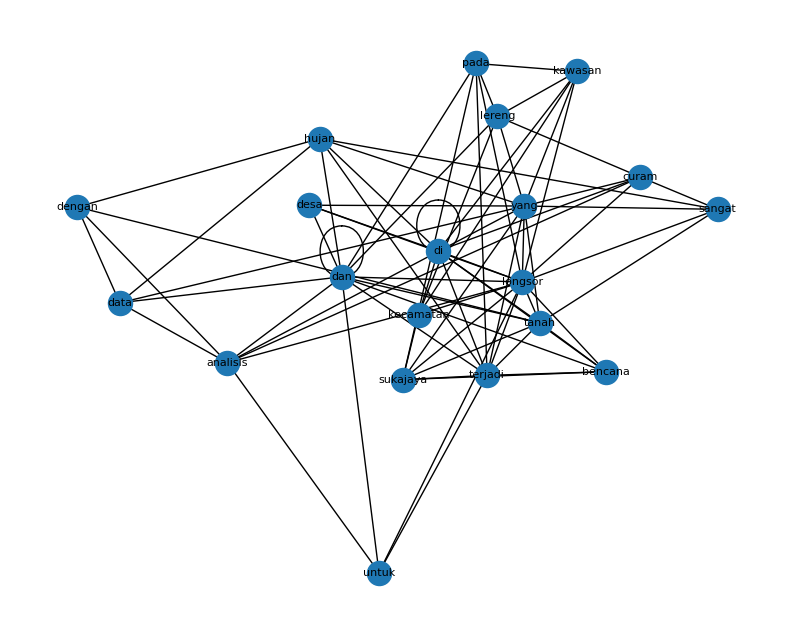

In [8]:
plt.figure(figsize=(10, 8))

subG = G.subgraph(top_vocab)
pos = nx.spring_layout(subG, k=0.4)

nx.draw_networkx_nodes(subG, pos)
nx.draw_networkx_edges(subG, pos)
nx.draw_networkx_labels(subG, pos, font_size=8)

plt.axis("off")
plt.show()